In [1]:
# load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn import metrics, svm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

## neural network library
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Input, BatchNormalization
from mlxtend.plotting import plot_confusion_matrix
import pickle
import joblib


# Data Cleaning
Fill missing values(0) wih mean/median

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Info for missing value and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# View some statistical details
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Data cleaning
column_name = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# Replace O with NaN
df[column_name] = df[column_name].replace(0, np.nan)

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [7]:
# Checking for missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

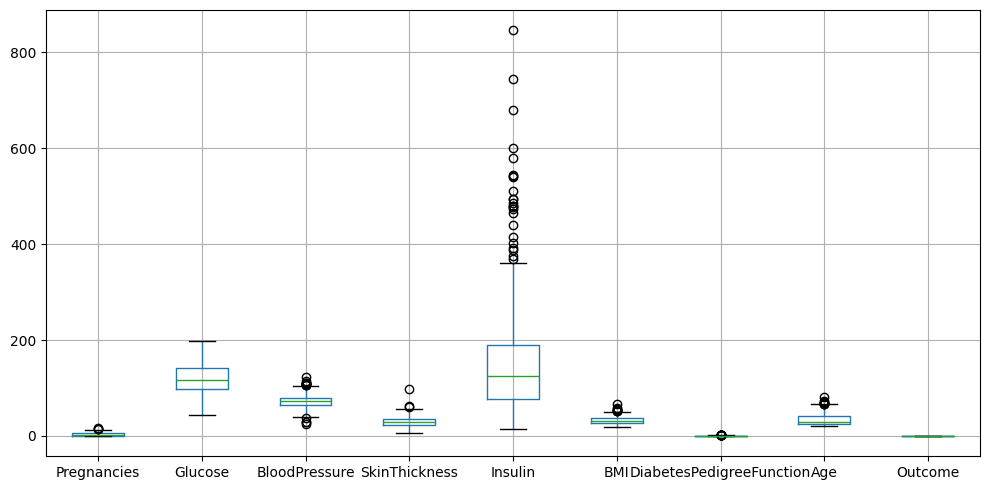

In [8]:
# Boxplot

df.boxplot(figsize=(10,5))
plt.tight_layout()
plt.show()

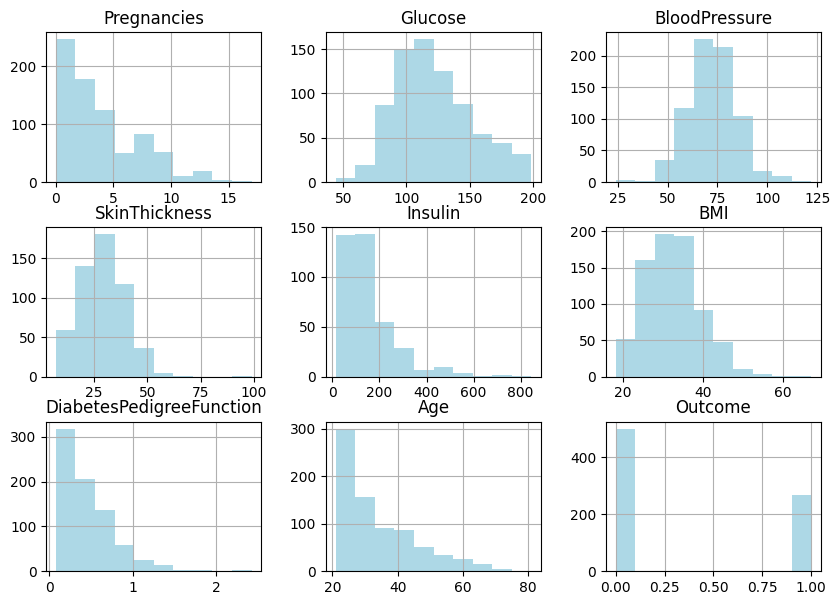

In [9]:
#histogram
df.hist(bins=10, figsize=(10,7), color='lightblue')
plt.show()

In [10]:
# Filling glucose, bloodpressure with mean
# FIlling skinthickness and insulin, BMI with median (skewed or outliers)
# Use fillna function

df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())


In [11]:
# Looking into the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [12]:
# Print dataset after inputing missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Exploratory Data Analysis
1. Boxplots & Histograms: Identify outliers and apply feature clipping
2. Correlation Matrix: identify important features

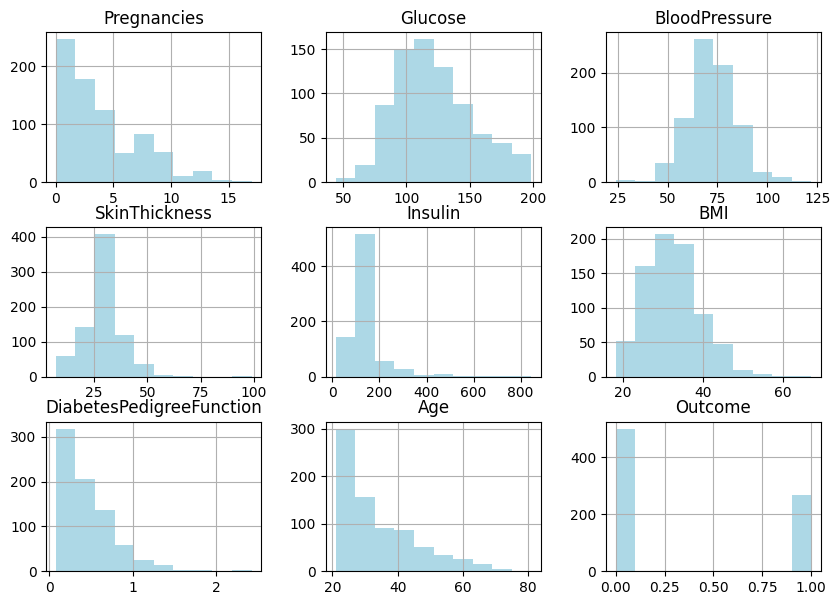

In [13]:
#histogram
df.hist(bins=10, figsize=(10,7), color='lightblue')
plt.show()

In [14]:
# Feature clipping right skewed features
# Define list of right skewed featutres
features = ['Pregnancies', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Feature clip
for feature in features:
    lower_limit, upper_limit = np.percentile(df[feature], [1,95])
    df[feature] = np.clip(df[feature], lower_limit, upper_limit)



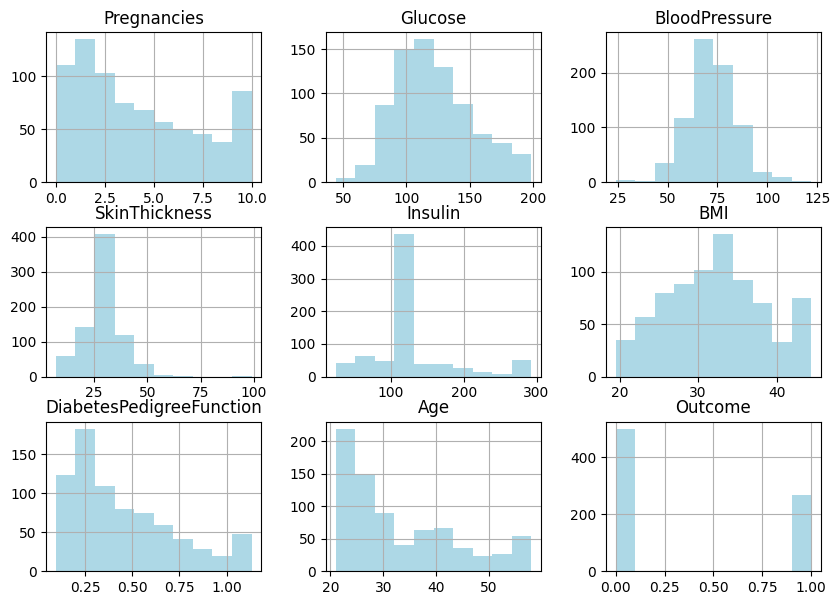

In [15]:
#histogram
df.hist(bins=10, figsize=(10,7), color='lightblue')
plt.show()

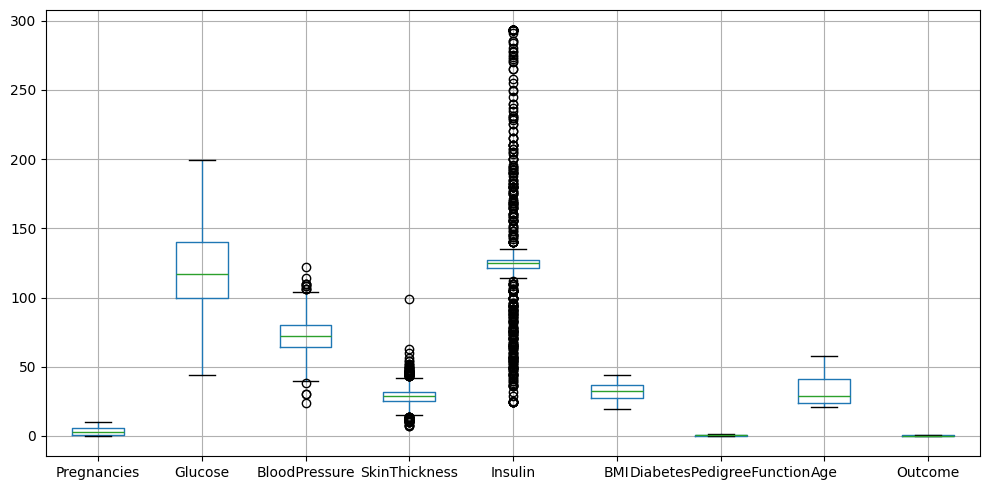

In [16]:
# Boxplot

df.boxplot(figsize=(10,5))
plt.tight_layout()
plt.show()

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.742188,121.686763,72.405184,29.108073,133.394167,32.253522,0.456076,32.951823,0.348958
std,3.123898,30.435949,12.096346,8.791221,57.136432,6.328695,0.278126,11.006885,0.476951
min,0.000000,44.000000,24.000000,7.000000,24.340000,19.500000,0.094680,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,10.000000,199.000000,122.000000,99.000000,293.000000,44.395000,1.132850,58.000000,1.000000


In [18]:
# Counting the number of diabetic and non diabetic from the dataset
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

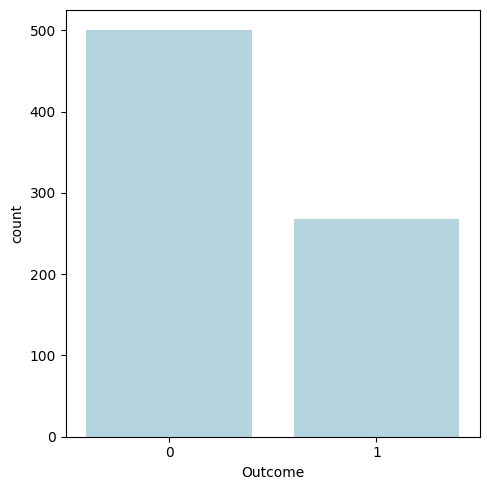

In [19]:
# Plot a chart
plt.figure(figsize=(5,5))
sns.countplot(x = 'Outcome', data = df, color='lightblue')
plt.tight_layout()
plt.show()

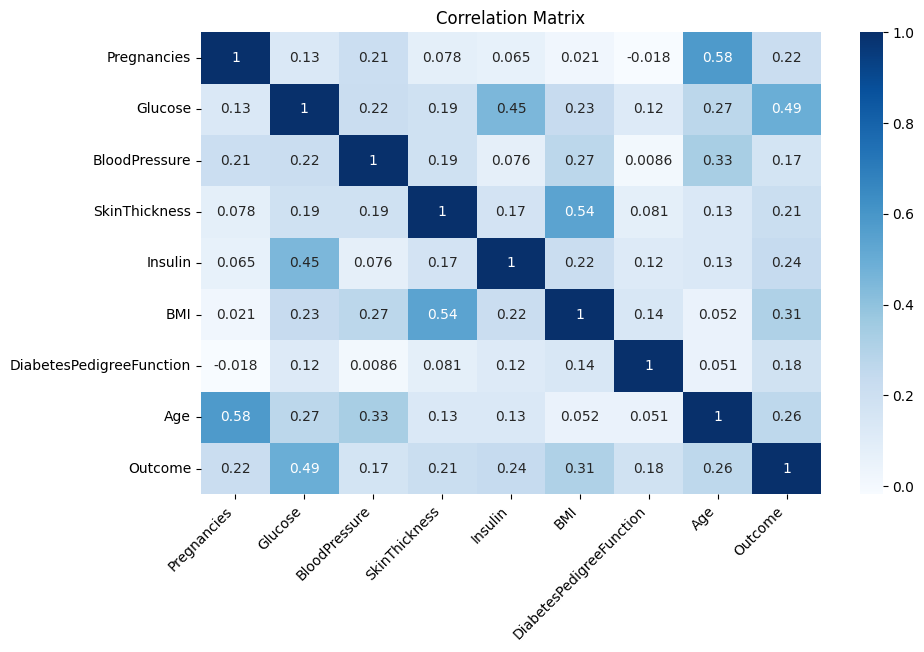

In [20]:
# Correlation matrix
plt.figure(figsize=(10,6))
corr_mat = df.corr()
sns.heatmap(corr_mat, cmap='Blues', annot=True)

plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [21]:
# Store in outcome_correlations, the correlation of features with the Outcome variable
outcome_correlations = df.corr()["Outcome"].drop("Outcome").sort_values(ascending=False)

outcome_correlations

Glucose                     0.492928
BMI                         0.310664
Age                         0.260498
Insulin                     0.239152
Pregnancies                 0.219720
SkinThickness               0.214873
DiabetesPedigreeFunction    0.184303
BloodPressure               0.166074
Name: Outcome, dtype: float64

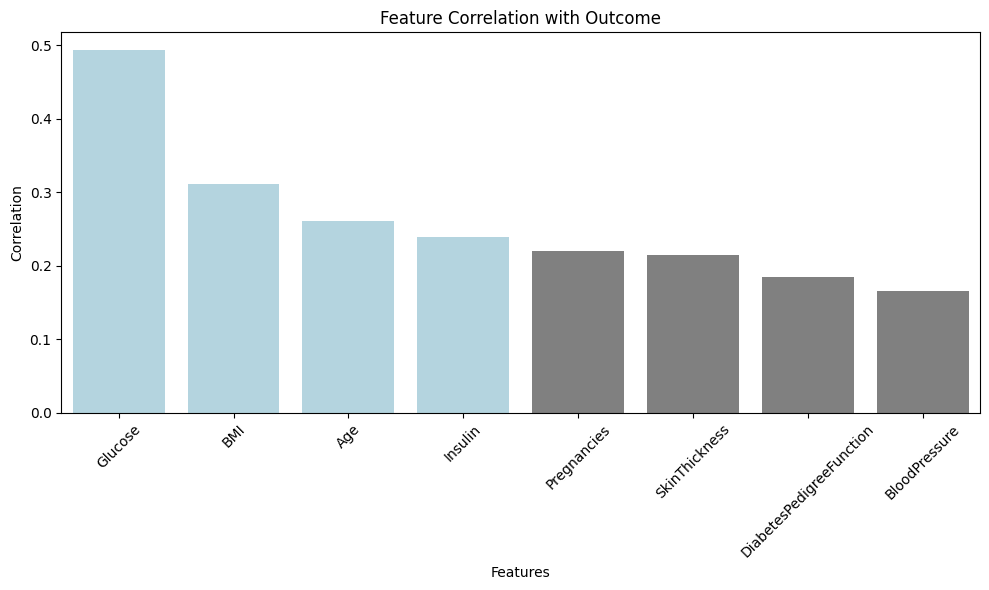

In [22]:
# Define custom colors for bars
custome_palette = ["grey" if x < 0.23 else "lightblue" for x in outcome_correlations]

# Visualize Correlation with Outcome
plt.figure(figsize=(10,6))
sns.barplot(x=outcome_correlations.index, y=outcome_correlations.values, hue=outcome_correlations.index, palette=custome_palette, legend=False)
plt.xticks(rotation=45)
plt.title("Feature Correlation with Outcome")
plt.ylabel("Correlation")
plt.xlabel("Features")

plt.tight_layout()
plt.show()

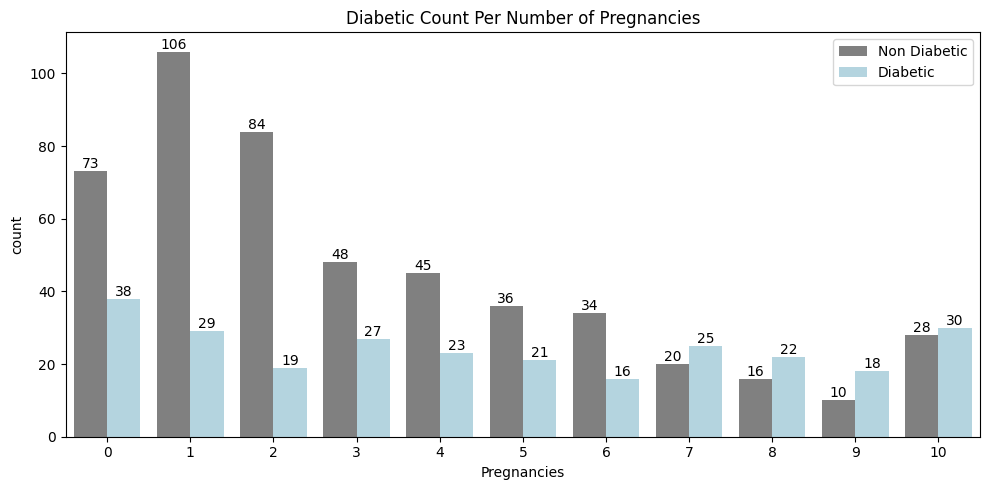

In [23]:
# Visualise diabetic count per number of pregnancies
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.countplot(ax=ax, data=df, x="Pregnancies", hue="Outcome", palette=["grey", "lightblue"])
ax.legend(['Non Diabetic', 'Diabetic'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Diabetic Count Per Number of Pregnancies')

plt.tight_layout()  
plt.show()

In [24]:
df.to_csv('diabetes_cleaned.csv', index=False)

# Feature Scaling

In [25]:
# Define independent and dependent variables
x=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [26]:
# Convert featurs to a standard normal distribution using Standard Scaler
# Initialize the StandardScaler
scaler= StandardScaler()

# Fit and transform the data (Mean = 0, Standard deviation = 1)
scale_x = scaler.fit_transform(x)

# Save the scaler to file using pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler has been re-saved successfully!")

Scaler has been re-saved successfully!


In [27]:
# Check module used for feature scaling
print(type(scaler))

<class 'sklearn.preprocessing._data.StandardScaler'>


# Train-Test Split

In [28]:
# Train, Test and Split
x_train, x_test, y_train, y_test = train_test_split(scale_x, y, test_size=0.2, stratify=y, random_state=23)

# Artificial Neural Network

In [29]:
## Neural Network
## initialise the NN
model = Sequential()

## Set up the input/ visible layer
model.add(Input(shape=(8,)))

# Hidden layer 1
model.add(Dense(units= 128, kernel_initializer= 'he_uniform', activation = 'relu'))
# regularization 1
model.add(Dropout(0.3))


# Hidden layer 2
model.add(Dense(units= 64, kernel_initializer= 'he_uniform', activation = 'relu'))
# Regularization 2
model.add(Dropout(0.3))

# Hidden layer 3
model.add(Dense(units= 32, kernel_initializer= 'he_uniform', activation = 'relu'))
# Regularization 3
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units= 1, activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size = 64, epochs = 100, validation_split=0.25)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5890 - loss: 0.9351 - val_accuracy: 0.6948 - val_loss: 0.5945
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6117 - loss: 0.7258 - val_accuracy: 0.6558 - val_loss: 0.5843
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6521 - loss: 0.7076 - val_accuracy: 0.6883 - val_loss: 0.5427
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6882 - loss: 0.5972 - val_accuracy: 0.7208 - val_loss: 0.5112
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7106 - loss: 0.5366 - val_accuracy: 0.7468 - val_loss: 0.4869
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6882 - loss: 0.5585 - val_accuracy: 0.7662 - val_loss: 0.4756
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7589 - loss: 0.5078 - val_accuracy: 0.7532 - val_loss: 0.4719
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7084 - loss: 0.5721 - val_accuracy: 0.7662 - val_loss: 0.4749

# Model Performance Evaluation

In [30]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 77.21%


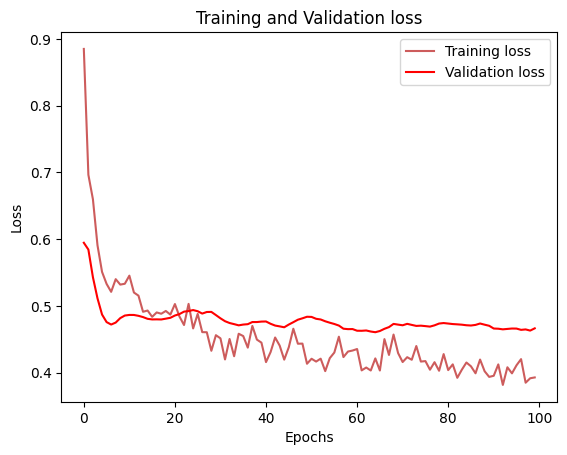

In [31]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

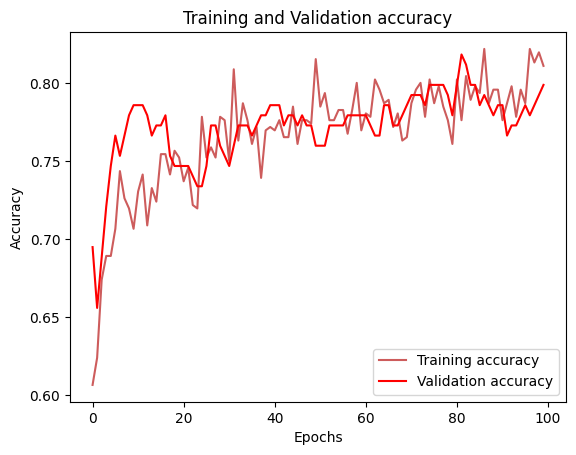

In [32]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
# Predicting the test set results
y_pred = model.predict(x_test)
y_pred = np.where(y_pred > 0.4, 1, 0)
np.set_printoptions()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [34]:
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.6996


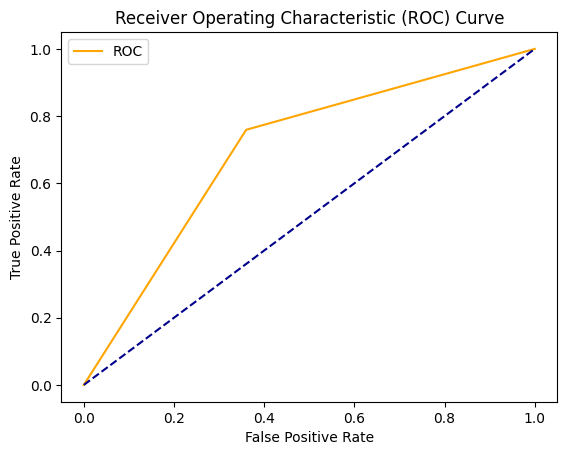

In [35]:
fpr, tpr = roc_curve(y_test, y_pred)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

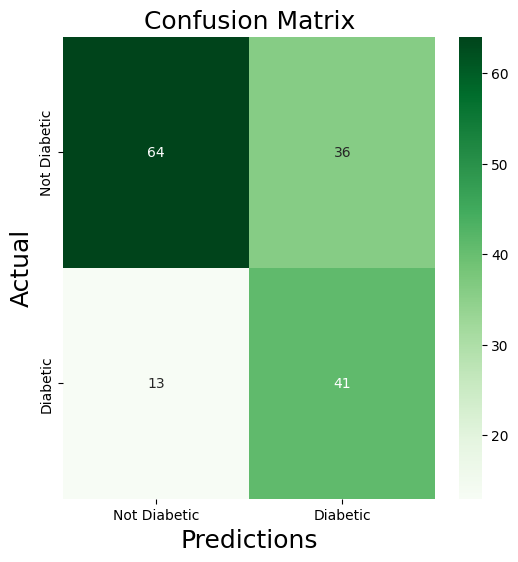

In [36]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Create labels
labels = ['Not Diabetic', 'Diabetic']

# Plot confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.64      0.72       100
           1       0.53      0.76      0.63        54

    accuracy                           0.68       154
   macro avg       0.68      0.70      0.67       154
weighted avg       0.73      0.68      0.69       154



In [38]:
## save the ann model
keras.saving.save_model(model, 'diabetes.keras')

# Support Vector Machine

In [39]:
# Instantiating the SVM algorithm
# Create a SVM Classifier with different kernels
svm_linear = svm.SVC(kernel='linear')
svm_sigmoid = svm.SVC(kernel='sigmoid') 
svm_rbf = svm.SVC(kernel='rbf')

# Fitting the model
svm_linear.fit(x_train, y_train)
svm_sigmoid.fit(x_train, y_train)
svm_rbf.fit(x_train, y_train)

# Predicting the test variables
y_pred_linear = svm_linear.predict(x_test)
y_pred_sigmoid = svm_sigmoid.predict(x_test)
y_pred_rbf = svm_rbf.predict(x_test)

# Getting the score
print("Linear Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_linear))
print("Sigmoid Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_sigmoid))
print("rbf Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_rbf))



Linear Kernel Accuracy: 0.7597402597402597
Sigmoid Kernel Accuracy: 0.6818181818181818
rbf Kernel Accuracy: 0.7467532467532467


In [40]:
# Save the svm model
with open('svm.pkl', 'wb') as f:
    pickle.dump(svm_linear, f)

print("model has been re-saved successfully!")

model has been re-saved successfully!


In [41]:
# Make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})

,Actual,Predicted
73,0,0
475,0,0
747,0,0
316,0,0
332,1,1
...,...,...
30,0,0
142,0,0
669,0,1
722,1,0


In [42]:
# Make a dataframe prediction for sigmoid kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_sigmoid})

,Actual,Predicted
73,0,1
475,0,0
747,0,0
316,0,0
332,1,1
...,...,...
30,0,1
142,0,0
669,0,1
722,1,0


In [43]:
# Make a dataframe prediction for rbf kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rbf})

,Actual,Predicted
73,0,0
475,0,1
747,0,0
316,0,0
332,1,1
...,...,...
30,0,0
142,0,0
669,0,1
722,1,1


In [44]:
# Confussion matrix for the kernels
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)

print(conf_mat_linear)
print(conf_mat_sigmoid)
print(conf_mat_rbf)

[[89 11]
 [26 28]]
[[81 19]
 [30 24]]
[[84 16]
 [23 31]]


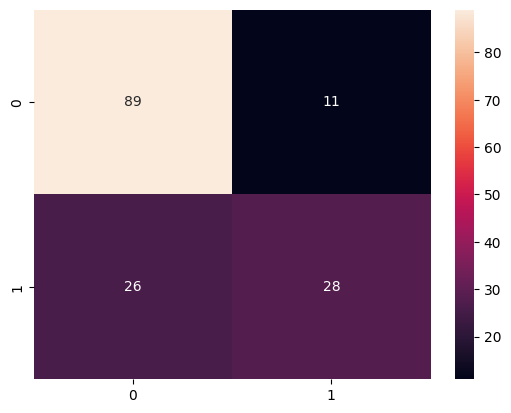

In [45]:
sns.heatmap(conf_mat_linear, annot=True, fmt='.0f')

plt.show()

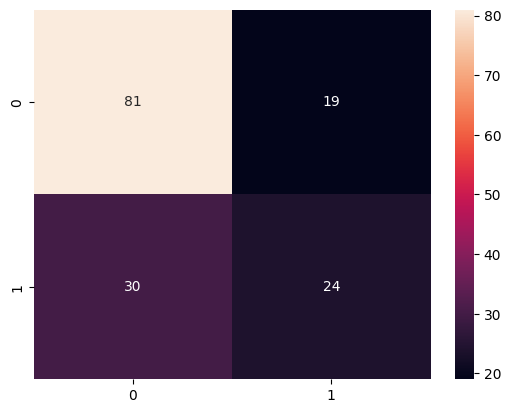

In [46]:
sns.heatmap(conf_mat_sigmoid, annot=True, fmt='.0f')

plt.show()

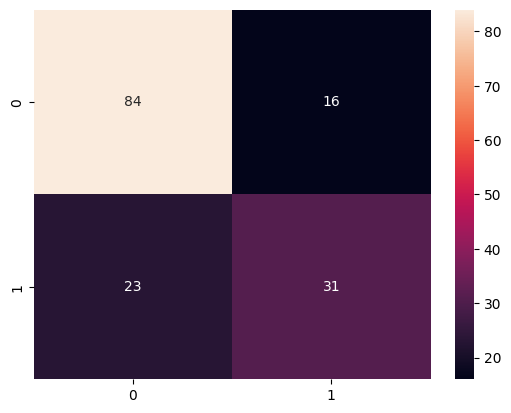

In [47]:
sns.heatmap(conf_mat_rbf, annot=True, fmt='.0f')

plt.show()

In [48]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



In [49]:
auc = roc_auc_score(y_test, y_pred_linear)
print('AUC: %f' %auc)

AUC: 0.704259


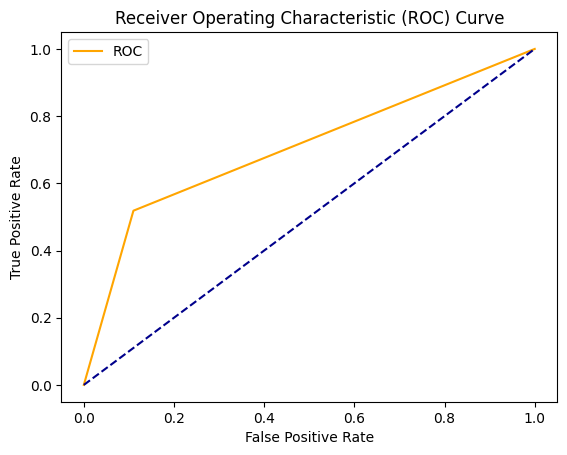

In [50]:
fpr, tpr = roc_curve(y_test, y_pred_linear)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Logisitic Regression

In [51]:
# Independent and dependent variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [52]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [53]:
# split our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 32)

In [54]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
171,6,134.0,70.0,23.0,130.0,35.4,0.542,29
346,1,139.0,46.0,19.0,83.0,28.7,0.654,22
511,0,139.0,62.0,17.0,210.0,22.1,0.207,21
121,6,111.0,64.0,39.0,125.0,34.2,0.260,24
241,4,91.0,70.0,32.0,88.0,33.1,0.446,22
...,...,...,...,...,...,...,...,...
403,9,72.0,78.0,25.0,125.0,31.6,0.280,38
88,10,136.0,70.0,32.0,110.0,37.1,0.153,43
310,6,80.0,66.0,30.0,125.0,26.2,0.313,41
555,7,124.0,70.0,33.0,215.0,25.5,0.161,37


In [55]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
X_train

array([[ 0.69706452,  0.4407303 , -0.23501033, ...,  0.48780722,
         0.31315885, -0.37138906],
       [-0.89309541,  0.60657738, -2.25513587, ..., -0.57960483,
         0.71228377, -0.99939241],
       [-1.2111274 ,  0.60657738, -0.90838551, ..., -1.63108535,
        -0.88065233, -1.08910718],
       ...,
       [ 0.69706452, -1.35041815, -0.57169792, ..., -0.97789291,
        -0.50290909,  0.70518813],
       [ 1.01509651,  0.10903614, -0.23501033, ..., -1.08941357,
        -1.04457864,  0.34632907],
       [-1.2111274 ,  0.67291621,  0.94339624, ...,  0.00986152,
        -0.07527524, -0.99939241]])

In [57]:
""" # Can also try robust scaling or minmaxscaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) """

' # Can also try robust scaling or minmaxscaler\nsc = RobustScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test) '

In [58]:
X_train

array([[ 0.69706452,  0.4407303 , -0.23501033, ...,  0.48780722,
         0.31315885, -0.37138906],
       [-0.89309541,  0.60657738, -2.25513587, ..., -0.57960483,
         0.71228377, -0.99939241],
       [-1.2111274 ,  0.60657738, -0.90838551, ..., -1.63108535,
        -0.88065233, -1.08910718],
       ...,
       [ 0.69706452, -1.35041815, -0.57169792, ..., -0.97789291,
        -0.50290909,  0.70518813],
       [ 1.01509651,  0.10903614, -0.23501033, ..., -1.08941357,
        -1.04457864,  0.34632907],
       [-1.2111274 ,  0.67291621,  0.94339624, ...,  0.00986152,
        -0.07527524, -0.99939241]])

In [59]:
X_test

array([[ 0.69706452,  0.8719327 ,  0.60670865, ..., -0.45215264,
        -0.98399717,  1.51262101],
       [ 1.01509651,  0.70608563,  1.44842763, ..., -0.30876894,
        -1.16217795,  0.88461766],
       [-0.57506343, -0.05681094, -0.03256141, ..., -2.02937343,
         1.34660732,  2.23033913],
       ...,
       [ 0.37903254, -0.38850509, -0.90838551, ...,  0.55153331,
         0.21337761, -0.73024812],
       [ 1.3331285 , -0.02364152,  0.43836486, ..., -1.16907118,
        -0.16080201,  2.23033913],
       [-0.57506343,  1.80067634,  1.28008383, ..., -1.50363317,
        -0.45658209, -0.99939241]])

In [60]:
# Logisitic regression model
# Extentention of linear regression. converting output into 0,1 (for binary classfication)
# Linear relationshop between the features we are workign with.

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)



LogisticRegression()

In [61]:
# Predict on the test data
y_pred_log = log_reg.predict(X_test)
y_pred_log

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [62]:
# Putting in a dataframe
df1 = pd.DataFrame({'Actual_value': y_test, 'Predicted_value': y_pred_log})
df1

,Actual_value,Predicted_value
642,1,0
695,1,0
453,0,0
565,0,0
99,1,0
...,...,...
455,1,1
354,0,0
216,1,0
509,0,0


In [63]:
accuracy_score(y_test, y_pred_log)

0.7878787878787878

In [64]:
# model evaluation 
# r2, mean absolute error, mean square error, root mean square error
# 0, 1
# mae must have a lower mae 0. 
# mse --o.
# rmse 0. 
r2 = metrics.r2_score(y_test, y_pred_log)
meanABerr = metrics.mean_absolute_error(y_test, y_pred_log)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_log)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_log))
print('R2:',r2)
print('Mean Absolute Error:',meanABerr)
print('Mean Square Error:',meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)

R2: 0.08333333333333326
Mean Absolute Error: 0.21212121212121213
Mean Square Error: 0.21212121212121213
Root Mean Square Error: 0.4605661864718383


In [65]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, y_pred_log)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, y_pred_log)

print(accuracy_LR)
print(conf_mat)

0.7878787878787878
[[131  16]
 [ 33  51]]


In [66]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       147
           1       0.76      0.61      0.68        84

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



In [67]:
auc = roc_auc_score(y_test, y_pred_log)
print('AUC: %f' %auc)

AUC: 0.749150


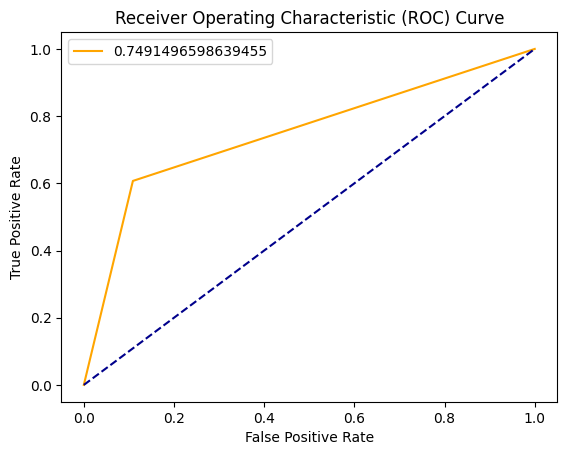

In [68]:
fpr, tpr, _ = roc_curve(y_test, y_pred_log)

plt.plot(fpr, tpr, color='orange', label=auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

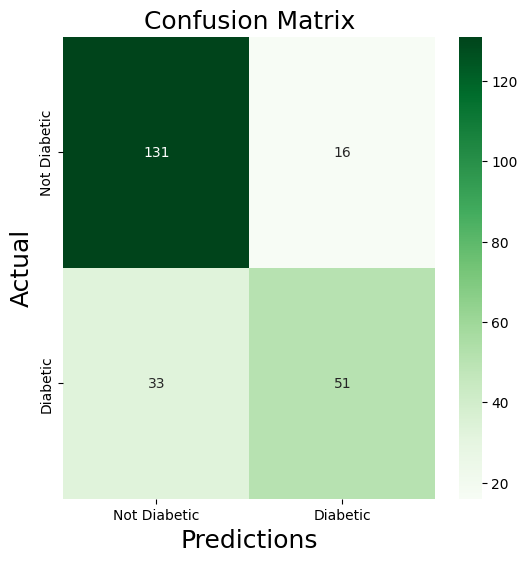

In [69]:
# Create labels
labels = ['Not Diabetic', 'Diabetic']

# Plot confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_mat, 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()